In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline



# Interpolation data 6 min Snow Hill and shelltown

C:\Users\dveronez\AppData\Local\Temp\ipykernel_20120\2775086227.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="6T")


Interpolated data saved to:
C:\Github\Lab_work\Pocomoke\POCOMOKE_DEM\BC_sheltown\tides_6min_spline.xlsx


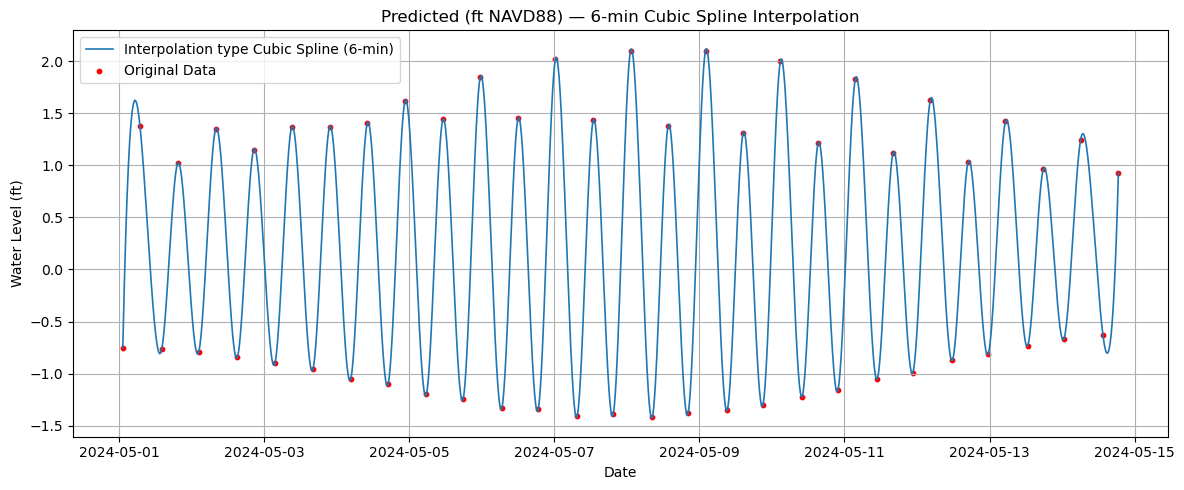

In [ ]:
#Shelltown, MD
# === USER INPUT ===
input_path = r"C:\Github\Lab_work\Pocomoke\POCOMOKE_DEM\BC_sheltown\BC_Shellfinal.xlsx"
output_path = r"C:\Github\Lab_work\Pocomoke\POCOMOKE_DEM\BC_sheltown\tides_6min_spline.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path)
df.columns = df.columns.str.strip()  # Clean column names
df["Date"] = df["Date"].astype(str)
df["Time"] = df["Time"].astype(str)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("DateTime", inplace=True)
df.rename(columns={"Predicted (ft)(NAV)": "WaterLevel_ft"}, inplace=True)
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna()
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 6-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="6T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(12, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (6-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 6-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\dveronez\AppData\Local\Temp\ipykernel_5184\2525199465.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="6T")


Interpolated data saved to:
C:\Github\Lab_work\Pocomoke\POCOMOKE_DEM\BC_sheltown\tides_6min_spline_snow.xlsx


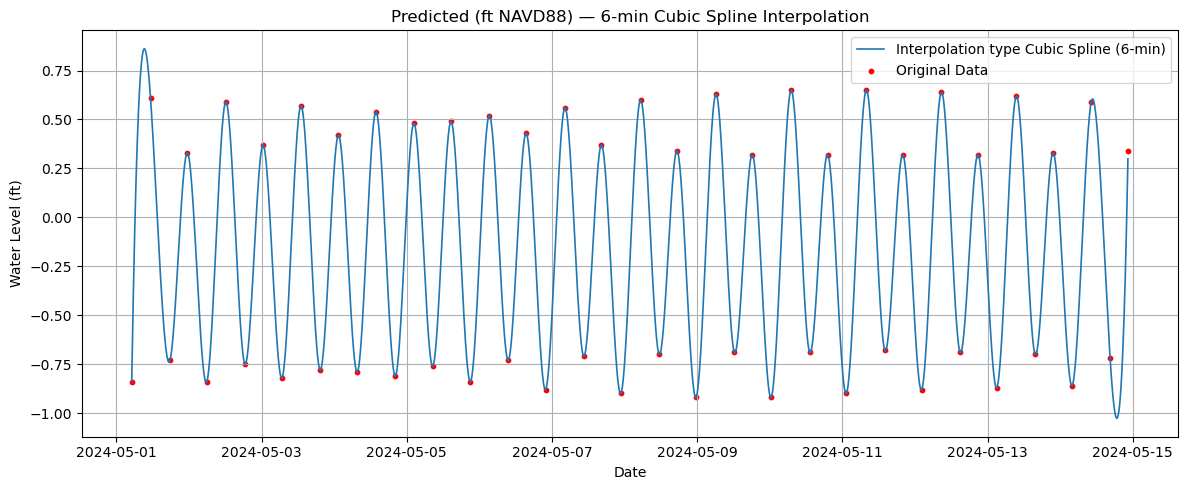

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# === USER INPUT ===
input_path = r"C:\Github\Lab_work\Pocomoke\POCOMOKE_DEM\BC_sheltown\Book_Snowhill.xlsx"
output_path = r"C:\Github\Lab_work\Pocomoke\POCOMOKE_DEM\BC_sheltown\tides_6min_spline_snow.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path)
df.columns = df.columns.str.strip()  # Clean column names
df["Date"] = df["Date"].astype(str)
df["Time"] = df["Time"].astype(str)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("DateTime", inplace=True)
df.rename(columns={"Predicted (ft)(NAV)": "WaterLevel_ft"}, inplace=True)
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna()
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 6-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="6T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(12, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (6-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 6-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Interpolation with 1min interval - Snowhill and Shelltown

C:\Users\dveronez\AppData\Local\Temp\ipykernel_24848\999982533.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="6T")


Interpolated data saved to:
C:\Github\Data\EESLR\Coastal_Validation\tides_1min_splineshel.xlsx


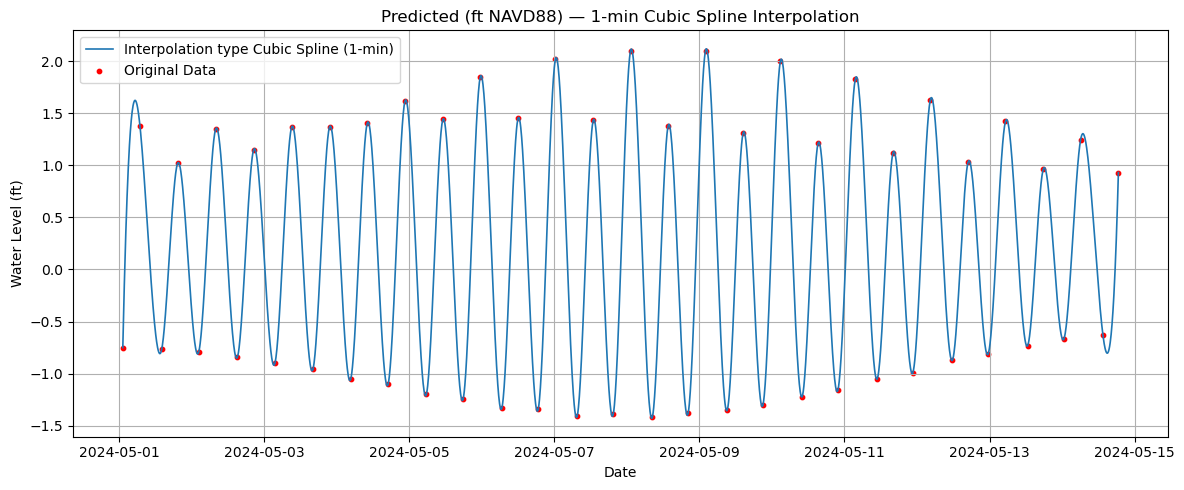

In [3]:
#Shelltown, MD
# === USER INPUT ===
input_path = r"C:\Github\Lab_work\Pocomoke\POCOMOKE_DEM\BC_sheltown\BC_Shellfinal.xlsx"
output_path = r"C:\Github\Data\EESLR\Coastal_Validation\tides_1min_splineshel.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path)
df.columns = df.columns.str.strip()  # Clean column names
df["Date"] = df["Date"].astype(str)
df["Time"] = df["Time"].astype(str)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("DateTime", inplace=True)
df.rename(columns={"Predicted (ft)(NAV)": "WaterLevel_ft"}, inplace=True)
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna()
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 6-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="6T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(12, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (1-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 1-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\dveronez\AppData\Local\Temp\ipykernel_24848\3387753270.py:27: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")


Interpolated data saved to:
C:\Github\Data\EESLR\Coastal_Validation\tides_1min_spline_snow.xlsx


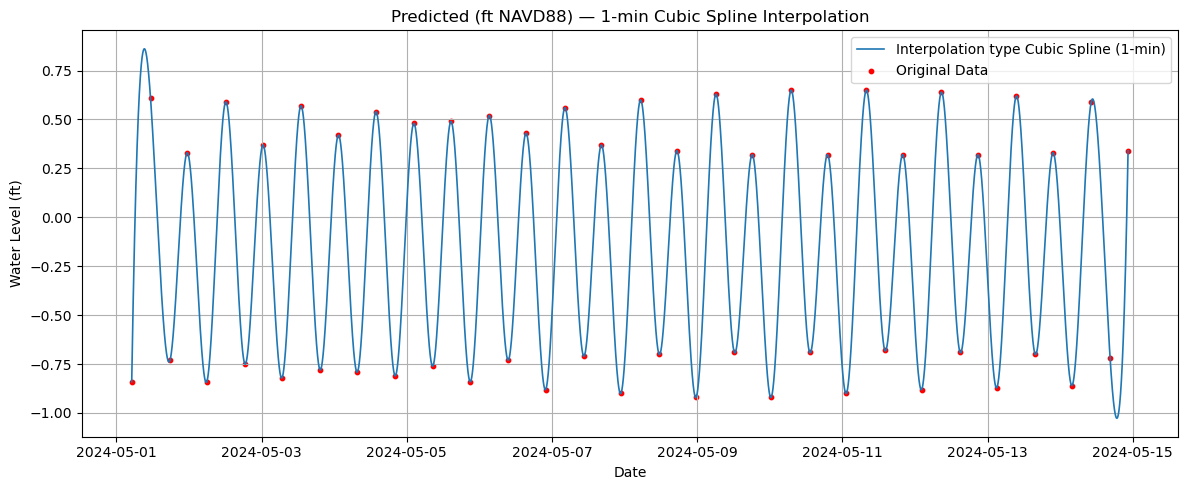

In [ ]:
#Snowhill
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# === USER INPUT ===
input_path = r"C:\Github\Lab_work\Pocomoke\POCOMOKE_DEM\BC_sheltown\Book_Snowhill.xlsx"
output_path = r"C:\Github\Data\EESLR\Coastal_Validation\tides_1min_spline_snow.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path)
df.columns = df.columns.str.strip()  # Clean column names
df["Date"] = df["Date"].astype(str)
df["Time"] = df["Time"].astype(str)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("DateTime", inplace=True)
df.rename(columns={"Predicted (ft)(NAV)": "WaterLevel_ft"}, inplace=True)
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna()
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 6-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(12, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (1-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 1-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Interpolation Starling - saxis gauge

C:\Users\dveronez\AppData\Local\Temp\ipykernel_46572\2428636035.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")


Interpolated data saved to:
C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_star.xlsx


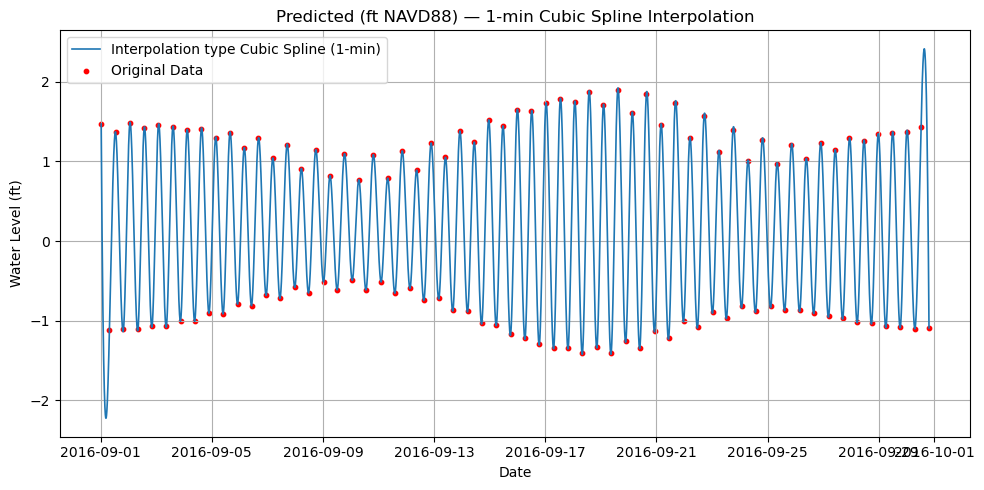

In [ ]:
#SStarling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# === USER INPUT ===
input_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_starling.xlsx"
output_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_star.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path)
df.columns = df.columns.str.strip()  # Clean column names
df["Date"] = df["Date"].astype(str)
df["Time"] = df["Time"].astype(str)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("DateTime", inplace=True)
df.rename(columns={"Predicted (ft)(NAV)": "WaterLevel_ft"}, inplace=True)
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna()
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 1-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(10, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (1-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 1-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\dveronez\AppData\Local\Temp\ipykernel_46572\2694440882.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")


Interpolated data saved to:
C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_shel.xlsx


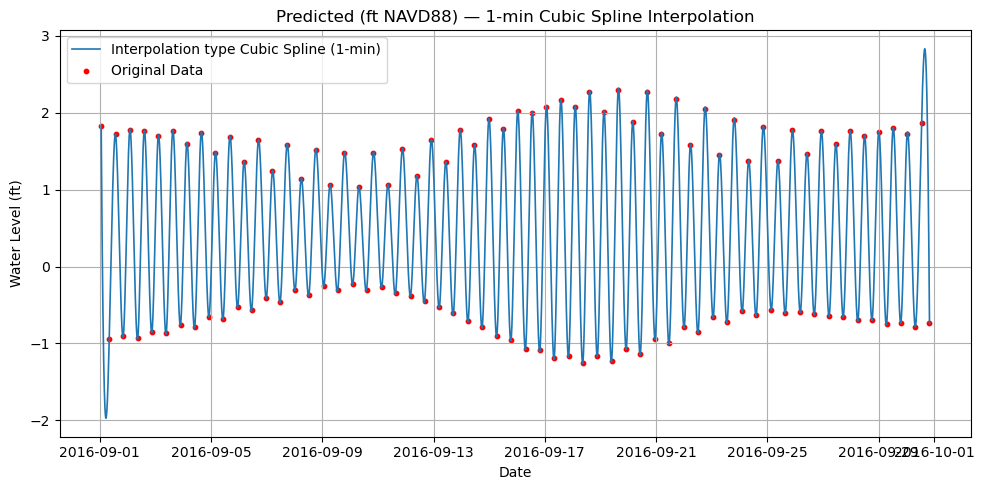

In [16]:
#Sheltown, MD
# === USER INPUT ===
input_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_shelltown.xlsx"
output_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_shel.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path)
df.columns = df.columns.str.strip()  # Clean column names
df["Date"] = df["Date"].astype(str)
df["Time"] = df["Time"].astype(str)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("DateTime", inplace=True)
df.rename(columns={"Predicted (ft)(NAV)": "WaterLevel_ft"}, inplace=True)
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna()
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 1-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(10, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (1-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 1-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\dveronez\AppData\Local\Temp\ipykernel_46572\1502903603.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")


Interpolated data saved to:
C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_snow.xlsx


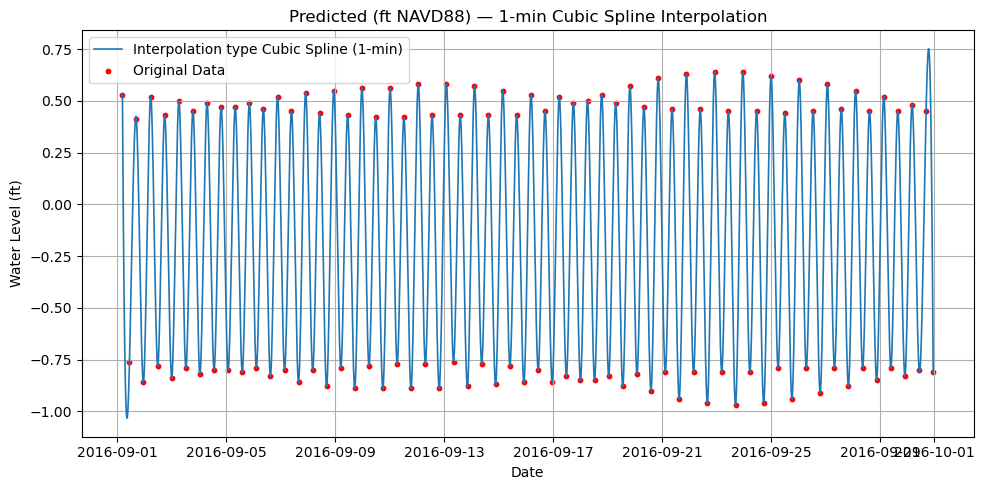

In [17]:
#Snow Hill, MD
# === USER INPUT ===
input_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_snow.xlsx"
output_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_snow.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path)
df.columns = df.columns.str.strip()  # Clean column names
df["Date"] = df["Date"].astype(str)
df["Time"] = df["Time"].astype(str)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("DateTime", inplace=True)
df.rename(columns={"Predicted (ft)(NAV)": "WaterLevel_ft"}, inplace=True)
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna()
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 1-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(10, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (1-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 1-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Interpolation using GMT time Show and shel

# snow

C:\Users\dveronez\AppData\Local\Temp\ipykernel_24192\3535143349.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")


Interpolated data saved to:
C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_snowGMT.xlsx


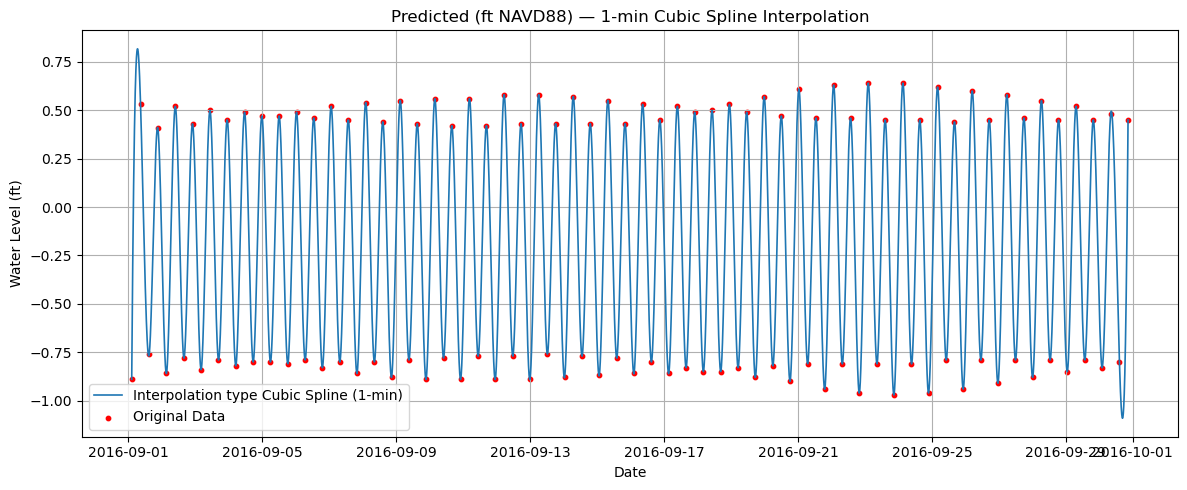

In [ ]:
#Snowhill

# === USER INPUT ===
input_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_sowGMT.xlsx"
output_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_snowGMT.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path)
df.columns = df.columns.str.strip()  # Clean column names
df["Date"] = df["Date"].astype(str)
df["Time"] = df["Time"].astype(str)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("DateTime", inplace=True)
df.rename(columns={"Predicted (ft)(NAV)": "WaterLevel_ft"}, inplace=True)
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna()
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 6-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(12, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (1-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 1-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Shel

C:\Users\dveronez\AppData\Local\Temp\ipykernel_24192\4199579420.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")


Interpolated data saved to:
C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_shelGMT.xlsx


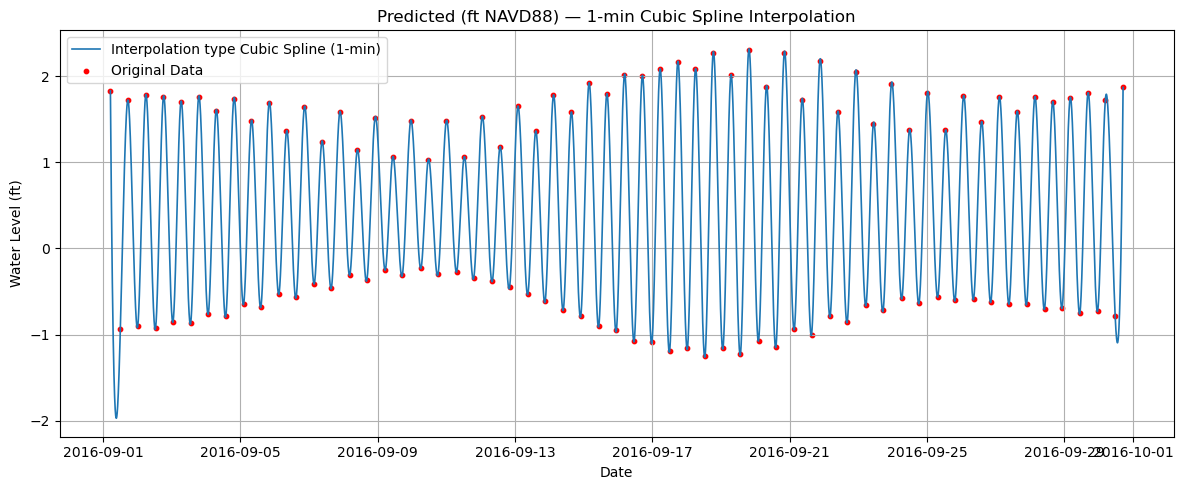

In [ ]:
#Shelltown, MD

# === USER INPUT ===
input_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_shelGMT.xlsx"
output_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_shelGMT.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path)
df.columns = df.columns.str.strip()  # Clean column names
df["Date"] = df["Date"].astype(str)
df["Time"] = df["Time"].astype(str)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("DateTime", inplace=True)
df.rename(columns={"Predicted (ft)(NAV)": "WaterLevel_ft"}, inplace=True)
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna()
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 6-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(12, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (1-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 1-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Interpolation using NOAA VDATUM 

In [ ]:
## Starling, MD

C:\Users\dveronez\AppData\Local\Temp\ipykernel_24192\3904605242.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")


Interpolated data saved to:
C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_starNOAA.xlsx


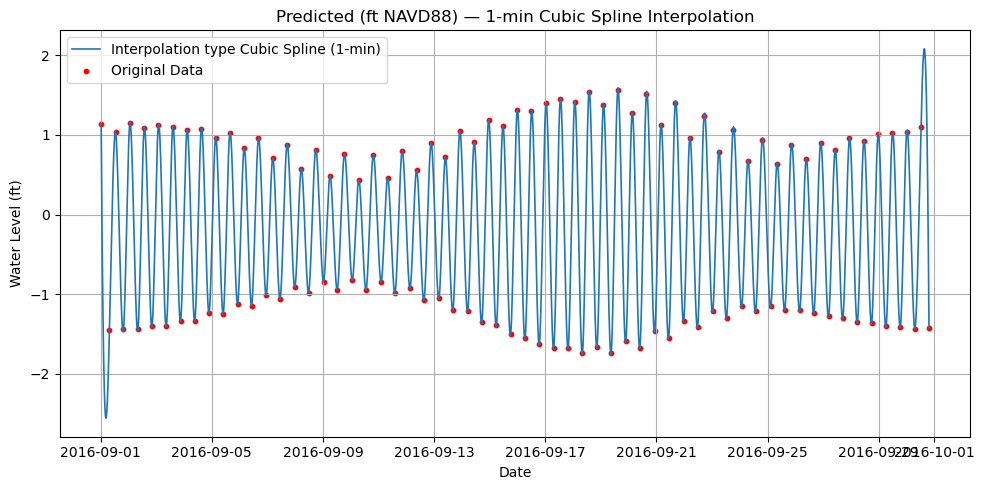

In [7]:
#SStarling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# === USER INPUT ===
input_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_starling.xlsx"
output_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_starNOAA.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path)
df.columns = df.columns.str.strip()  # Clean column names
df["Date"] = df["Date"].astype(str)
df["Time"] = df["Time"].astype(str)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("DateTime", inplace=True)
df.rename(columns={"Predicted (ft)(NAV)": "WaterLevel_ft"}, inplace=True)
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna()
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 1-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(10, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (1-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 1-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\dveronez\AppData\Local\Temp\ipykernel_24192\4182121308.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")


Interpolated data saved to:
C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_shelNOAA.xlsx


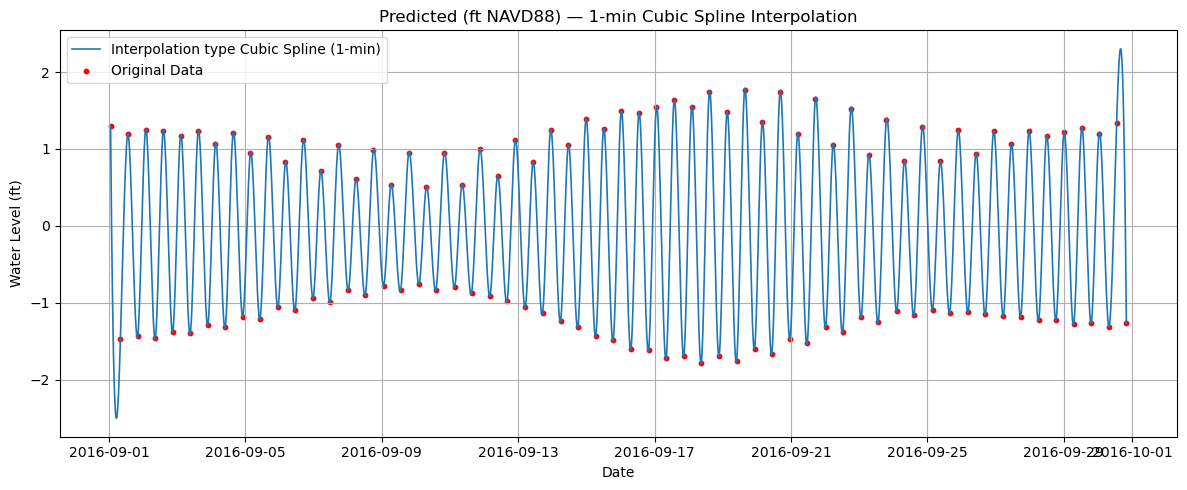

In [8]:
#Shelltown, MD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# === USER INPUT ===
input_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_shelltown.xlsx"
output_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_shelNOAA.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path)
df.columns = df.columns.str.strip()  # Clean column names
df["Date"] = df["Date"].astype(str)
df["Time"] = df["Time"].astype(str)
df["DateTime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("DateTime", inplace=True)
df.rename(columns={"Predicted (ft)(NAV)": "WaterLevel_ft"}, inplace=True)
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna()
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 6-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(12, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (1-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 1-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# USGS water levels


C:\Users\dveronez\AppData\Local\Temp\ipykernel_30176\2939330656.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")


Interpolated data saved to:
C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_starUSGS.xlsx


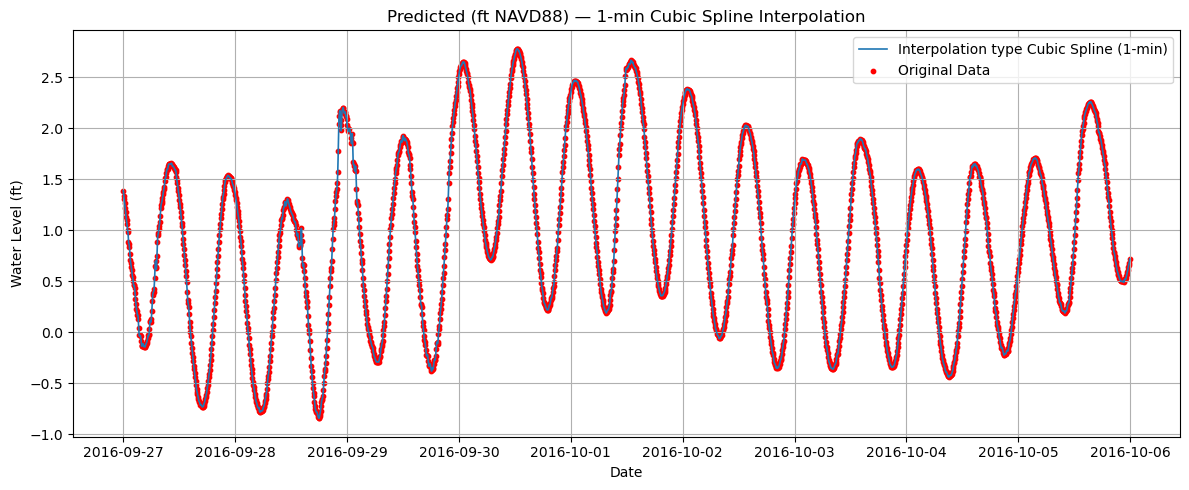

In [ ]:
#Starling USGS


# === USER INPUT ===
input_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_starlingUSGS.xlsx"
output_path = r"C:\Github\Lab_work\Pocomoke\Data_step2\tides_1min_spline_starUSGS.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path)
df.columns = df.columns.str.strip()  # Clean column names
df = df.rename(columns={"Predicted (ft)(NAV)": "WaterLevel_ft"})
df = df.set_index("Datetime")
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna()
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 6-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="1T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(12, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (1-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 1-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Interpolation USGS - Starling 2020

In [ ]:
#Starling USGS

# === USER INPUT ===
input_path = r"D:\GMU\Git_hub-Lab_work\Pocomoke\Interpolation\wl2020.xlsx"
output_path = r"D:\GMU\Git_hub-Lab_work\Pocomoke\Interpolation\wl2020_1min_spline_starUSGS.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path, sheet_name="WL_2020")
df.columns = df.columns.str.strip()  # Clean column names
df = df.rename(columns={"WL(ft)": "WaterLevel_ft"})
df = df.set_index("Datetime")
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna() # Remove rows with NaN values
valid_df = valid_df[~valid_df.index.duplicated(keep='first')]  # Remove duplicate datetimes
valid_df = valid_df.sort_index()  # Ensure strictly increasing order
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 6-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="6T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(12, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (6-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 6-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Interpolation USGS Helene Hurricane

C:\Users\dveronez\AppData\Local\Temp\ipykernel_34472\600011235.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="6T")


Interpolated data saved to:
D:\GMU\1. pendrive1\Git_hub-Lab_work\Pocomoke\Interpolation\wl2024_1min_spline_helene.xlsx


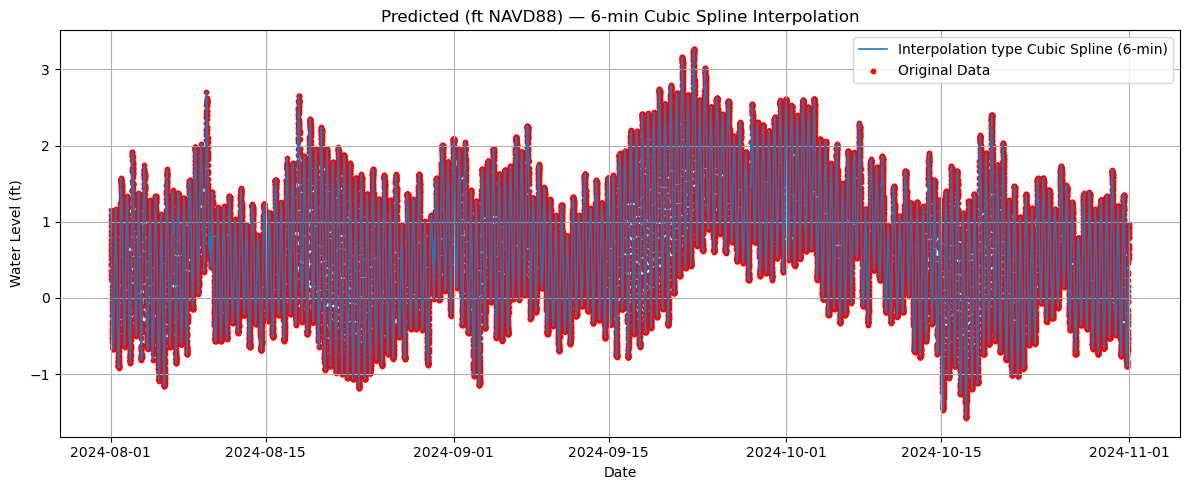

In [4]:
#Starling USGS

# === USER INPUT ===
input_path = r"D:\GMU\1. pendrive1\Git_hub-Lab_work\Pocomoke\Interpolation\Helene_2024.xlsx"
output_path = r"D:\GMU\1. pendrive1\Git_hub-Lab_work\Pocomoke\Interpolation\wl2024_1min_spline_helene.xlsx"

# === LOAD DATA ===
df = pd.read_excel(input_path, sheet_name="WL_2024")
df.columns = df.columns.str.strip()  # Clean column names
df = df.rename(columns={"WL(ft)": "WaterLevel_ft"})
df = df.set_index("Datetime")
df = df[["WaterLevel_ft"]]

# === PREPARE FOR SPLINE ===
valid_df = df.dropna() # Remove rows with NaN values
valid_df = valid_df[~valid_df.index.duplicated(keep='first')]  # Remove duplicate datetimes
valid_df = valid_df.sort_index()  # Ensure strictly increasing order
timestamps = valid_df.index.astype(np.int64) // 10**9  # seconds since epoch
values = valid_df["WaterLevel_ft"].values
spline = CubicSpline(timestamps, values)

# === INTERPOLATE TO 6-MIN INTERVAL ===
new_time_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq="6T")
new_timestamps = new_time_index.astype(np.int64) // 10**9
interpolated_values = spline(new_timestamps)

# === BUILD RESULT DF ===
df_spline = pd.DataFrame({"WaterLevel_ft": interpolated_values}, index=new_time_index)
df_spline.index.name = "DateTime"

# === SAVE TO EXCEL ===
df_spline.to_excel(output_path)
print(f"Interpolated data saved to:\n{output_path}")

# === PLOT ===
plt.figure(figsize=(12, 5))
plt.plot(df_spline.index, df_spline["WaterLevel_ft"], label="Interpolation type Cubic Spline (6-min)", linewidth=1.2)
plt.scatter(df.index, df["WaterLevel_ft"], color='red', s=10, label="Original Data")
plt.title("Predicted (ft NAVD88) — 6-min Cubic Spline Interpolation")
plt.xlabel("Date")
plt.ylabel("Water Level (ft)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()